<a href="https://colab.research.google.com/github/atifhalim/RPS/blob/master/proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages('randomForest', repos='http://cran.rstudio.com/')
install.packages('caret', repos='http://cran.rstudio.com/')
#install.packages("e1071")
#install.packages("C50")
#install.packages("gmodels")
#install.packages("irr")
#install.packages("RCurl")
install.packages("glmnet", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘lars’




In [ ]:
library(dplyr)
ds <- read.csv(file = "maize_data1.csv")
ds = select(ds,-1)
summary(ds$DtoA)
ds<-na.omit(ds)
ds<-subset(ds, ds$DtoA >= 100000)
summary(ds$DtoA)
#ds <- as_tibble(ds)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     81  735549  768923  701366  790873  912349 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 660158  748482  773224  771304  793342  912349 

In [ ]:
library(caret)
set.seed(22)
train_ind <- createDataPartition(ds$DtoA, p = 0.7, list = FALSE) 
ds.train <- ds[train_ind,]
ds.test <- ds[-train_ind,]
print("TRAIN")
mean(ds.train$DtoA)
print("TEST")
mean(ds.test$DtoA)
rm(train_ind)
#rm(ds)
#ds.train <- as_tibble(ds.train)
#ds.test <- as_tibble(ds.test)

[1] "TRAIN"


[1] 771178.2

[1] "TEST"


[1] 771431

In [ ]:
library(caret)
set.seed(22)
train_ind <- createDataPartition(ds$DtoA, p = 0.9, list = FALSE) 
ds.train1 <- ds[train_ind,]
ds.test <- ds[-train_ind,]
print("TRAIN")
mean(ds.train1$DtoA)
print("TEST")
mean(ds.test$DtoA)
rm(train_ind)
rm(ds)
#ds.train1 <- as_tibble(ds.train1)
#ds.test <- as_tibble(ds.test)
rm(ds.train1)

[1] "TRAIN"


[1] 771187

[1] "TEST"


[1] 772372.1

In [ ]:
formula <- as.formula("DtoA ~ .")
#install.packages("glmnet", dependencies=TRUE)
library(glmnet)

# glmnet requires a model matrix. We begin by setting a seed and creating the model matrix.
set.seed(42)
X <- model.matrix(formula, ds.train)


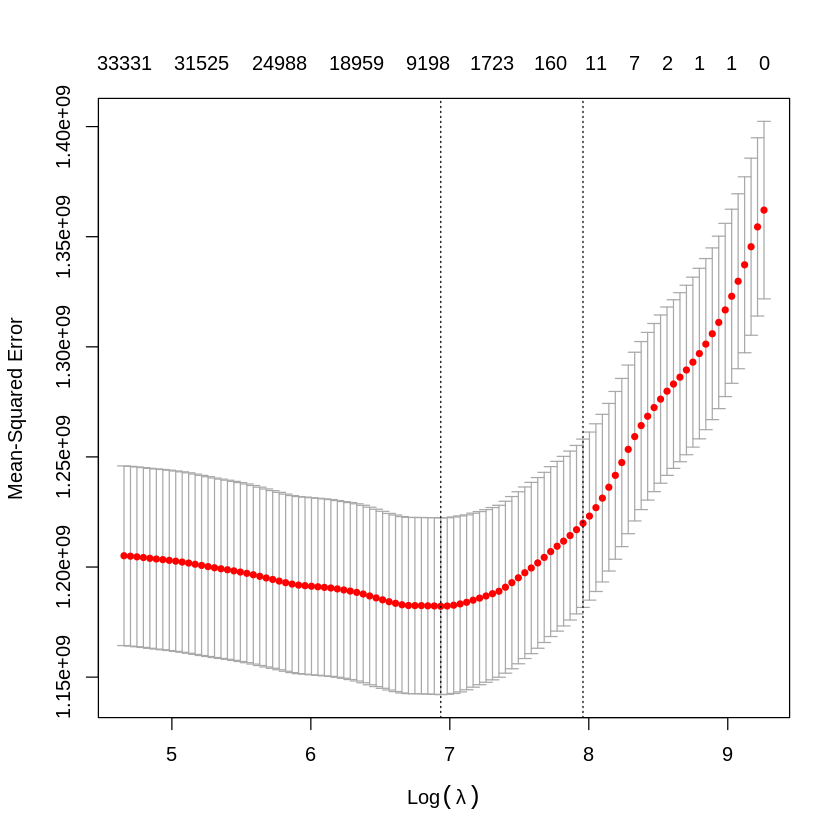

In [ ]:
lasso <- cv.glmnet(
  x = X,
  y = ds.train$DtoA,
  family = "gaussian",
  alpha = 1
)

plot(lasso)


In [ ]:
#coef(lasso,s=lasso$lambda.min)
lasso$lambda.min

[1] 1027.493

In [ ]:
lasso.best <- glmnet(
  x = X,
  y = ds.train$DtoA,
  family = "gaussian", 
  lambda = lasso$lambda.min,
  alpha = 1
)
X.test <- model.matrix(formula, ds.test)
#lasso.best$beta
ds.test$DtoA<-NULL
lasso.best.predict <- predict(lasso.best, newx = X.test, type = "response")
rmse <- sum((lasso.best.predict - ds.test$DtoA)^2) / nrow(ds.test)
rmse

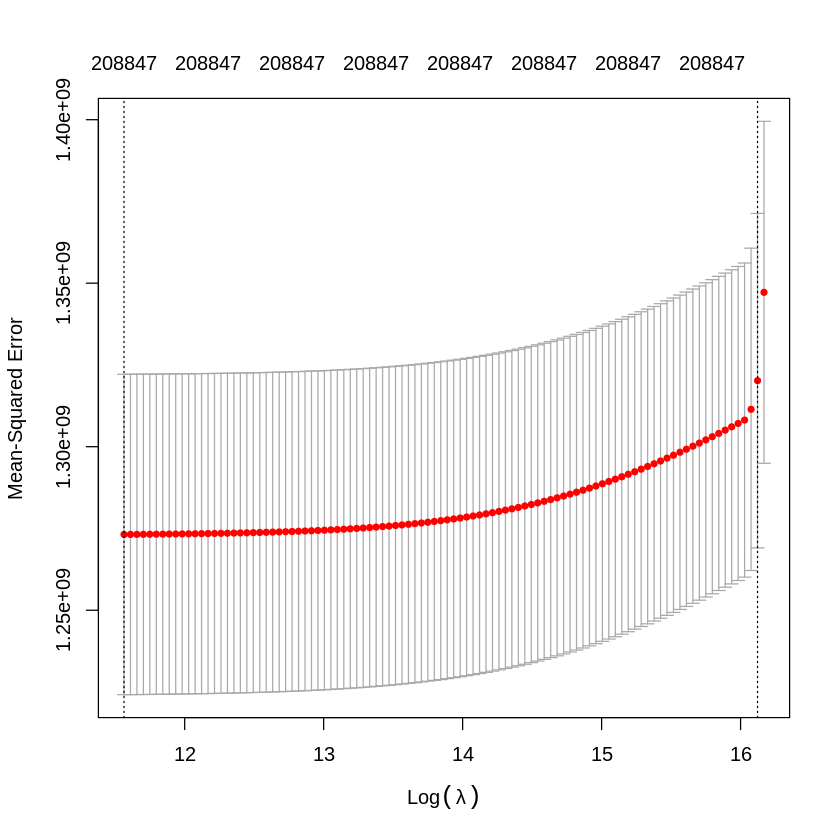

In [ ]:
ridge <- cv.glmnet(
  x = X,
  y = ds.train$DtoA,
  family = "gaussian",
  alpha = 0
)
plot(ridge)

In [ ]:
ridge.best <- glmnet(
  x = X,
  y = ds.train$DtoA,
  family = "gaussian", 
  lambda = ridge$lambda.min,
  alpha = 1
)
X.test <- model.matrix(formula, ds.test)
#ridge.best$beta
ds.test$DtoA<-NULL
ridge.best.predict <- predict(ridge.best, newx = X.test, type = "response")
rmse <- sum((ridge.best.predict - ds.test$DtoA)^2) / nrow(ds.test)
rmse

ERROR: ignored